In [139]:
import numpy as np
import pandas as pd

In [140]:
df = pd.read_csv('D:/sms-spam-classifier-main/spam.csv', encoding='ISO-8859-1')

In [141]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
816,ham,"He has lots of used ones babe, but the model d...",NaN,NaN,NaN
1199,ham,NEFT Transaction with reference number &lt;#&...,NaN,NaN,NaN
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...,NaN,NaN,NaN
489,ham,I think i've fixed it can you send a test mess...,NaN,NaN,NaN
731,ham,No he didn't. Spring is coming early yay!,NaN,NaN,NaN


In [142]:
df.shape

(5572, 5)

In [143]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [145]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [146]:
df.sample(5)

,v1,v2
1211,ham,Ok then i will come to ur home after half an hour
1646,ham,Thts wat Wright Brother did to fly..
1893,ham,Good Morning plz call me sir
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
5174,ham,Water logging in desert. Geoenvironmental impl...


In [147]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4600,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...
2090,ham,S:-)kallis wont play in first two odi:-)
1591,ham,That's my honeymoon outfit. :)
212,ham,K:)k:)good:)study well.
2603,ham,\Im at arestaurant eating squid! i will be out...


In [148]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [149]:
df['target'] = encoder.fit_transform(df['target'])

In [150]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [152]:
# check for duplicate values
df.duplicated().sum()

403

In [153]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [154]:
df.duplicated().sum()

0

In [155]:
df.shape

(5169, 2)

## 2.EDA

In [156]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

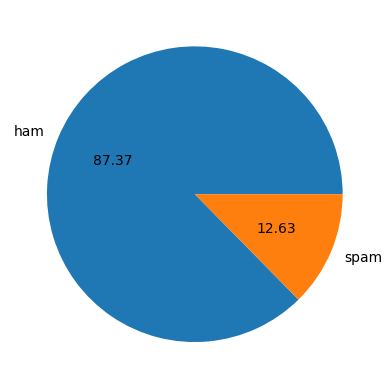

In [158]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [159]:
# Data is imbalanced

In [160]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\admi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [161]:
import nltk

In [162]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\admi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [163]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [164]:
df['num_characters'] = df['text'].apply(len)

In [165]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [166]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [167]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [168]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [169]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [170]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [171]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [173]:
import seaborn as sns

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

<Axes: xlabel='num_characters', ylabel='Count'>

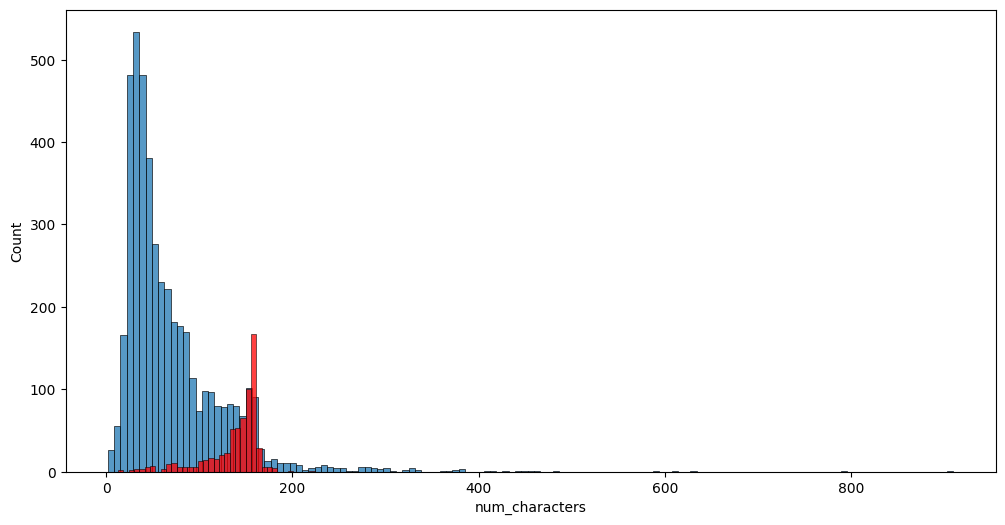

In [174]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

<Axes: xlabel='num_words', ylabel='Count'>

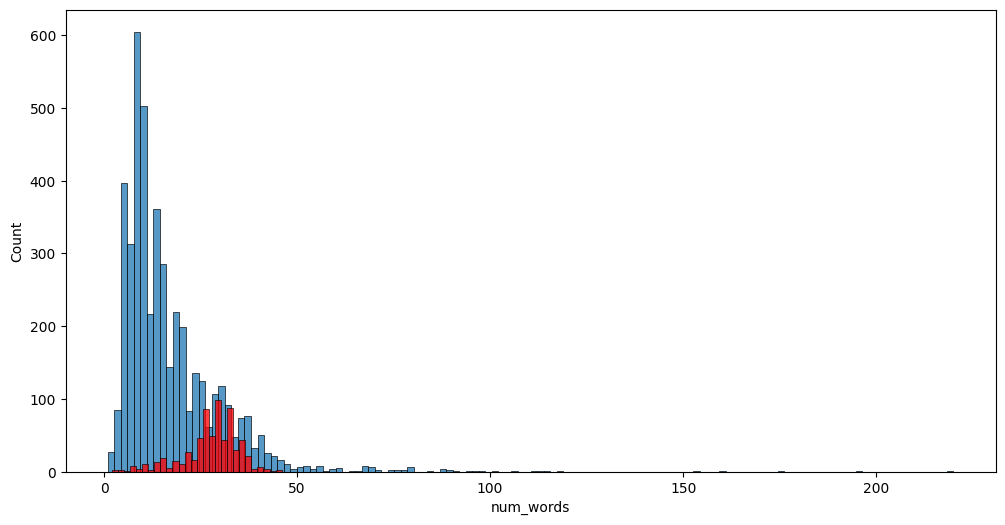

In [175]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

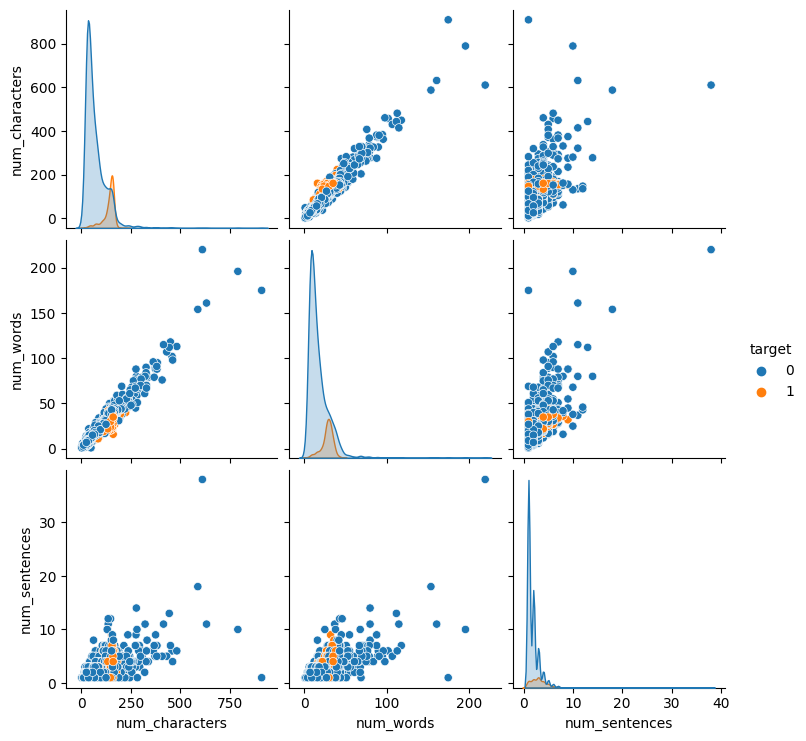

In [176]:
sns.pairplot(df,hue='target')

Non-numeric columns: Index(['text'], dtype='object')


C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


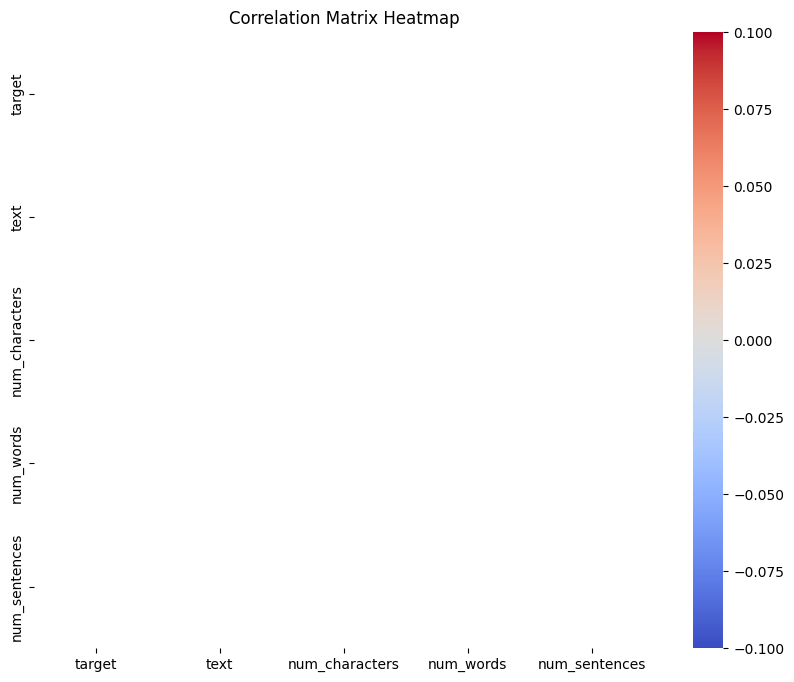

In [177]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# If there are non-numeric columns, handle them appropriately
if len(non_numeric_columns) > 0:
    # Print the non-numeric columns
    print("Non-numeric columns:", non_numeric_columns)
    # Optionally, you can choose to remove these columns or perform further preprocessing
    
# Convert remaining columns to numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
df_numeric = df_numeric.dropna()

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [188]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [189]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [190]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [191]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [192]:
df['transformed_text'] = df['text'].apply(transform_text)

In [274]:
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['target'], test_size=0.2, random_state=2)

# Text Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Hyperparameter tuning with Random Search for Multinomial Naive Bayes
param_dist = {'alpha': np.linspace(0.1, 1, 10), 'fit_prior': [True, False]}
mnb = MultinomialNB()
random_search = RandomizedSearchCV(estimator=mnb, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(X_train_tfidf, y_train)

best_alpha = random_search.best_params_['alpha']
best_fit_prior = random_search.best_params_['fit_prior']

# Model building using the best parameters
mnb_best = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
mnb_best.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = mnb_best.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Specify pos_label as integer (1)

print("Accuracy:", accuracy)
print("Precision for spam class:", precision)


Accuracy: 0.9796905222437138
Precision for spam class: 0.975609756097561


In [275]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('mnb', MultinomialNB())
])

# Define the parameter grid for Grid Search
param_grid = {
    'tfidf__max_features': [2000, 3000, 4000],
    'mnb__alpha': np.linspace(0.1, 1, 10),
    'mnb__fit_prior': [True, False]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision for spam class:", precision)
print("Recall for spam class:", recall)
print("F1-score for spam class:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9796905222437138
Precision for spam class: 0.975609756097561
Recall for spam class: 0.8695652173913043
F1-score for spam class: 0.9195402298850575
Confusion Matrix:
 [[893   3]
 [ 18 120]]


In [278]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

# Define the parameter distributions for Randomized Search
param_dist = {
    'tfidf__max_features': [2000, 3000, 4000],
    'mnb__alpha': np.linspace(0.1, 1, 10),
    'mnb__fit_prior': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from Randomized Search
best_model_random = random_search.best_estimator_

# Define the parameter distributions for Bayesian Optimization
param_dist_bayes = {
    'tfidf__max_features': (2000, 4000),
    'mnb__alpha': (0.1, 1),
    'mnb__fit_prior': [True, False]
}

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(pipeline, param_dist_bayes, n_iter=10, scoring='accuracy', cv=5, random_state=42)
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Optimization
best_model_bayes = bayes_search.best_estimator_

# Evaluation for Randomized Search
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, pos_label=1)
recall_random = recall_score(y_test, y_pred_random, pos_label=1)
f1_random = f1_score(y_test, y_pred_random, pos_label=1)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

print("Randomized Search Results:")
print("Accuracy:", accuracy_random)
print("Precision for spam class:", precision_random)
print("Recall for spam class:", recall_random)
print("F1-score for spam class:", f1_random)
print("Confusion Matrix:\n", conf_matrix_random)

# Evaluation for Bayesian Optimization
y_pred_bayes = best_model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
precision_bayes = precision_score(y_test, y_pred_bayes, pos_label=1)
recall_bayes = recall_score(y_test, y_pred_bayes, pos_label=1)
f1_bayes = f1_score(y_test, y_pred_bayes, pos_label=1)
conf_matrix_bayes = confusion_matrix(y_test, y_pred_bayes)

print("\nBayesian Optimization Results:")
print("Accuracy:", accuracy_bayes)
print("Precision for spam class:", precision_bayes)
print("Recall for spam class:", recall_bayes)
print("F1-score for spam class:", f1_bayes)
print("Confusion Matrix:\n", conf_matrix_bayes)


Randomized Search Results:
Accuracy: 0.9806576402321083
Precision for spam class: 0.9682539682539683
Recall for spam class: 0.8840579710144928
F1-score for spam class: 0.9242424242424243
Confusion Matrix:
 [[892   4]
 [ 16 122]]

Bayesian Optimization Results:
Accuracy: 0.9709864603481625
Precision for spam class: 1.0
Recall for spam class: 0.782608695652174
F1-score for spam class: 0.878048780487805
Confusion Matrix:
 [[896   0]
 [ 30 108]]


In [277]:
pip install scikit-optimize


  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/90/0e/15deb91b3db0003843e34e72fa865e1d92013781d986fdc65483c99a9f69/scikit_optimize-0.10.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/70/d9/6fdc01cee01fe56fddfd46892d9846ebb53a5f8eb78056955c516eef42c5/pyaml-24.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for PyYAML from https://files.pythonhosted.org/packages/24/97/9b59b43431f98d01806b288532da38099cc6f2fea0f3d712e21e269c0279/PyYAML-6.0.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   -------------------------------------- - 102.4/107.7 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 107.7/107.7 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/145.3 kB ? eta -:--:--
   ---------------------------------------- 145.3/145.3 kB 2.9 MB/s et


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\admi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [193]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [196]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [195]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.0 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/300.0 kB 3.6 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.0 kB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.0 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\admi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [197]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

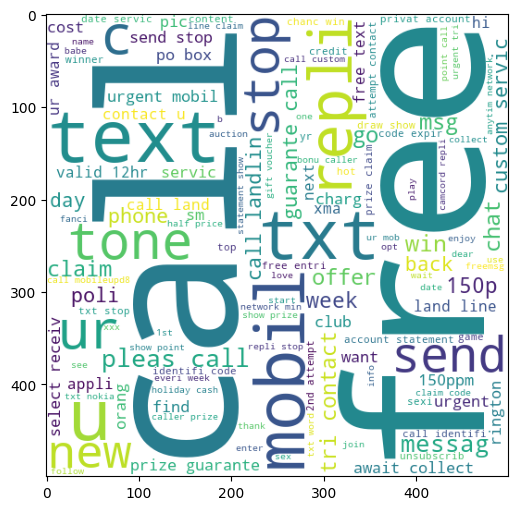

In [198]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [199]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

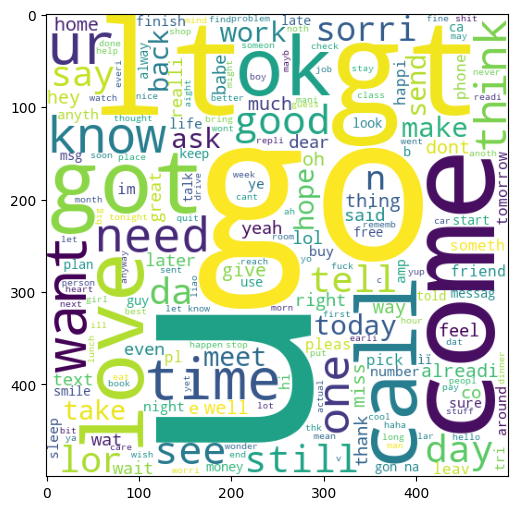

In [200]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [201]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [202]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [203]:
len(spam_corpus)

9939

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

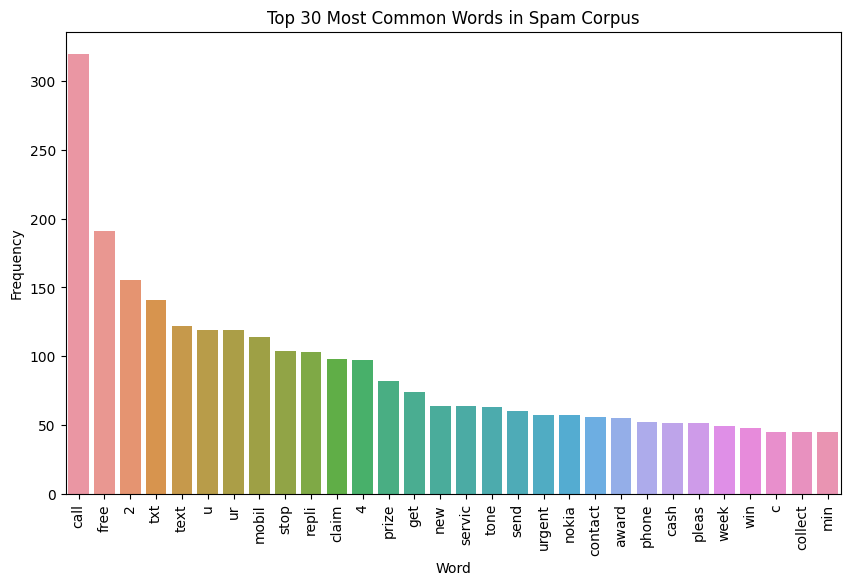

In [205]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is your list of words
# If spam_corpus is a list of sentences, you may need to tokenize it first
# Then, apply Counter to get word frequencies
# For example:
# spam_corpus = [word for sentence in spam_corpus for word in sentence.split()]

# Create a Counter object to count word frequencies
word_counter = Counter(spam_corpus)

# Convert Counter object to a DataFrame and select the most common 30 words
df_word_counts = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Plot the barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_word_counts, x='Word', y='Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [206]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [207]:
len(ham_corpus)

35404

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

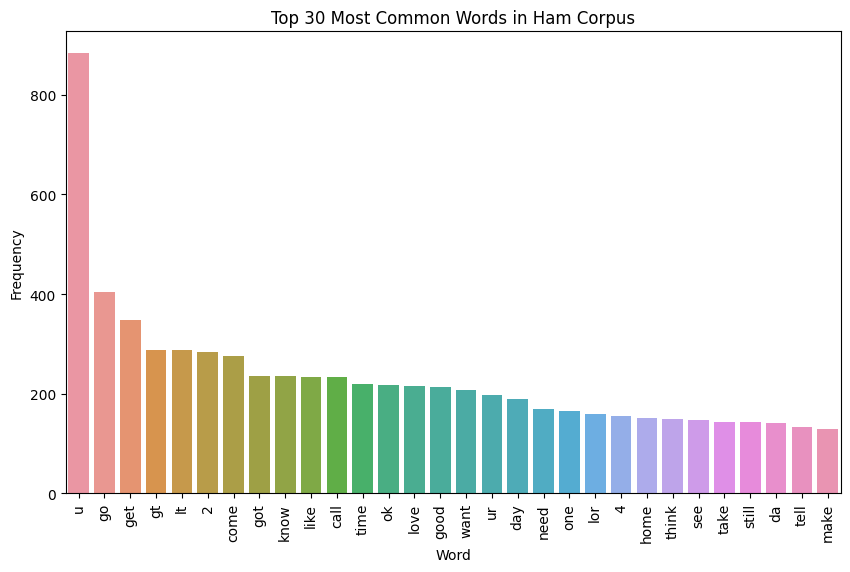

In [209]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is your list of words
# If ham_corpus is a list of sentences, you may need to tokenize it first
# Then, apply Counter to get word frequencies
# For example:
# ham_corpus = [word for sentence in ham_corpus for word in sentence.split()]

# Create a Counter object to count word frequencies
word_counter = Counter(ham_corpus)

# Convert Counter object to a DataFrame and select the most common 30 words
df_word_counts = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Plot the barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_word_counts, x='Word', y='Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()


In [210]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [211]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [212]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [213]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [214]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [215]:
X.shape

(5169, 3000)

In [216]:
y = df['target'].values

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [220]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [221]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [222]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [223]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [224]:
# tfidf --> MNB

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [226]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [227]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [229]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [230]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [231]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [232]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [233]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [235]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

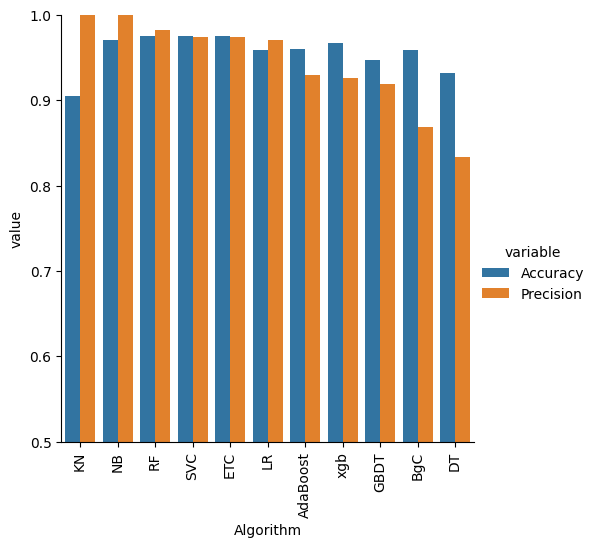

In [236]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [237]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [239]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [240]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [241]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [242]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [243]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [244]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [245]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [246]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [247]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [248]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [249]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [250]:
from sklearn.ensemble import StackingClassifier

In [251]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [252]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))